# Eddy Tian

## Research question/interests

I'm curious if there is any correlation between the source material of an anime (light novel, manga, original) and it's rating and popularity.

#### Note: I'm aware of the code needed to display all rows but Jupyter Lab becomes very slow with all 17562 rows shown. As such I decided to keep it shortened. 

## Task 1 (EDA):

In [ ]:
# import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/raw/anime.csv")
print(df.info())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

35 columns is *a lot*, I'll definitely want to drop most of them to focus on what is needed to answer my research question. As well, it looks like quite a few numerical columns aren't actually a numerical data type. I'll be sure to change that.

In [ ]:
print(df.nunique(axis=0))

MAL_ID           17562
Name             17558
Score              533
Genres            5034
English name      6831
Japanese name    16679
Type                 7
Episodes           201
Aired            11947
Premiered          231
Producers         3783
Licensors          231
Studios           1090
Source              16
Duration           313
Rating               7
Ranked           10490
Popularity       11755
Members           9508
Favorites         1543
Watching          3580
Completed         7822
On-Hold           2915
Dropped           3035
Plan to Watch     7055
Score-10          3379
Score-9           3645
Score-8           4515
Score-7           4933
Score-6           4236
Score-5           3288
Score-4           2235
Score-3           1506
Score-2           1110
Score-1           1084
dtype: int64


16 different sources is a fairly large number, I'll see if it's viable to analyze all of them. If not, I'll only analyze the top few most common sources.

In [ ]:
df.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


Looks like some animes have a `popularity` of 0, which makes no sense as the minimum should be 1 for the most popular anime of all time. Some also have a `completed` of 0, which means they have never been fully watched by even a single person, so I'll exclude those results.

In [ ]:
df.Source.unique()

array(['Original', 'Manga', 'Light novel', 'Game', 'Visual novel',
       '4-koma manga', 'Novel', 'Unknown', 'Other', 'Picture book',
       'Web manga', 'Music', 'Radio', 'Book', 'Card game',
       'Digital manga'], dtype=object)

I was curious what exactly the different sources were. I may choose to focus on just Original, Manga, and Light Novel if need be.

In [ ]:
df_cleaned = df.drop(['MAL_ID', 'Score-10','Score-9','Score-8','Score-7','Score-6','Score-5','Score-4','Score-3','Score-2','Score-1'], axis=1)
# I have no real use for individual scores when the mean average is already presented, so they'll be dropped
# each anime's internal MAL ID is also irrelevant

df_cleaned = df_cleaned[df_cleaned["Studios"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Source"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Score"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Ranked"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Episodes"] != "Unknown"]
# remove any animes with an unknown studio, source, or score, since I can't answer my research question on animes with no data in these areas
# also remove any anime with no rank or episode count

df_cleaned = df_cleaned[df_cleaned["Popularity"] > 0]
df_cleaned = df_cleaned[df_cleaned["Completed"] > 0]
# remove any animes that nobody has ever completely finished watching

df_cleaned['Ranked'] = df_cleaned['Ranked'].astype('int64')
df_cleaned['Score'] = df_cleaned['Score'].astype('float64')
df_cleaned['Episodes'] = df_cleaned['Episodes'].astype('int64')
# set rank, score, and episodes to numerical types

df_cleaned.shape

(7430, 24)

[Text(0.5, 1.0, 'Correlation Between Numerical Values')]

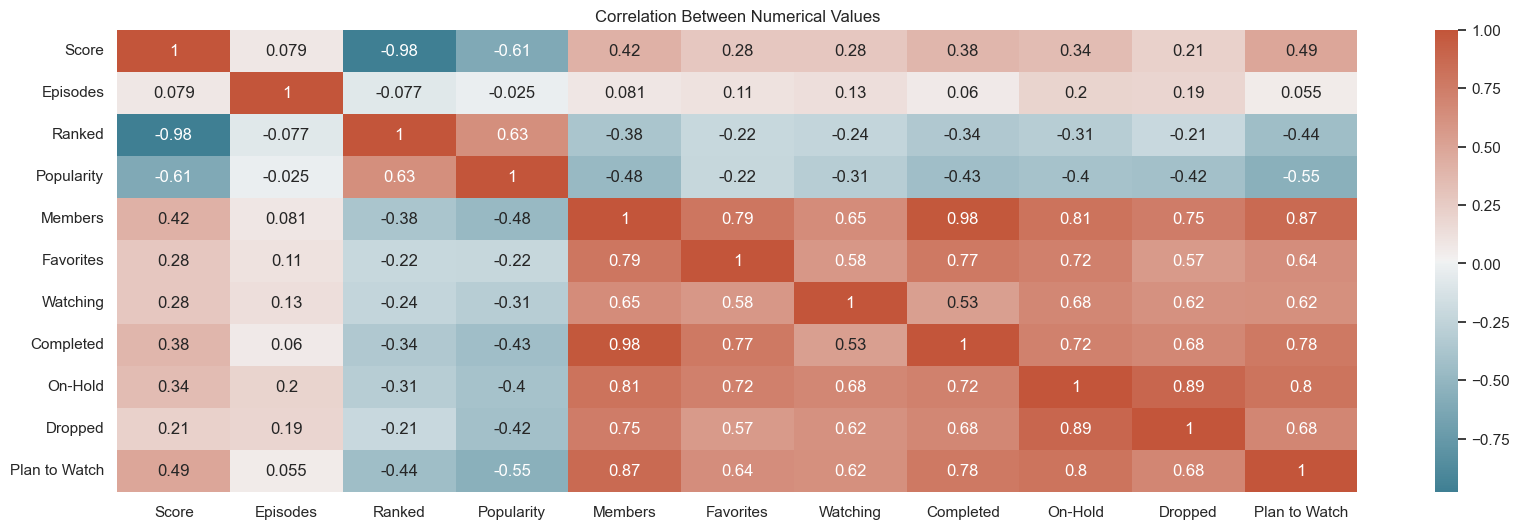

In [ ]:
heatmap = df_cleaned.corr()# plot the heatmap
sns.heatmap(heatmap, xticklabels=heatmap.columns, yticklabels=heatmap.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)).set(title="Correlation Between Numerical Values")

As a lower popularity and ranked score is actually better, any negative correlation for these is actually positive. As expected, the more popular an anime is, the more people plan to watch it, and popular animes correlate somewhat with high scores. Funnily enough, there is a slight correlation between how long an anime is and how many people have it on hold or have dropped it (presumably because it was too long).

Text(0, 0.5, 'Amount of Animes')

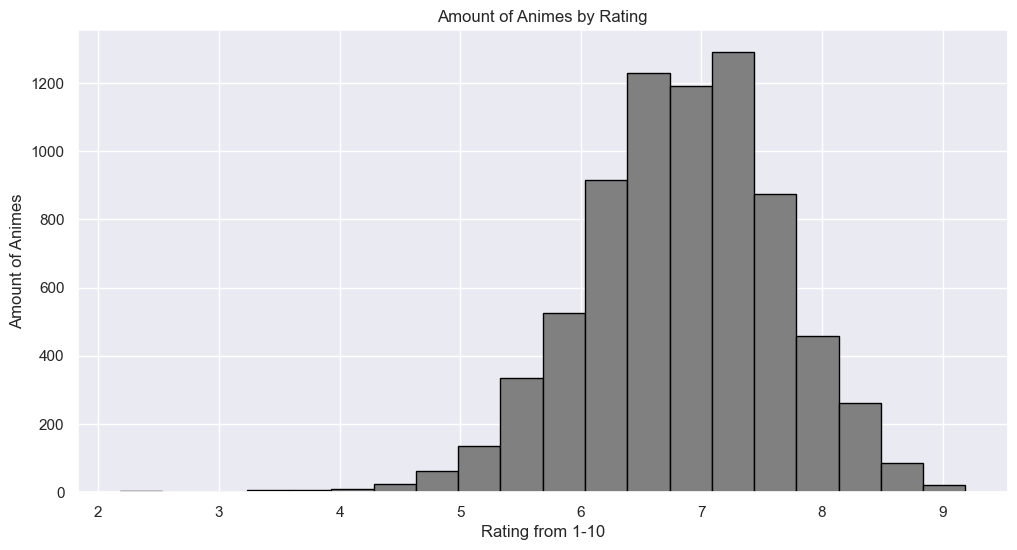

In [ ]:
df_cleaned['Score'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black').set(title="Amount of Animes by Rating")
plt.xlabel("Rating from 1-10")
plt.ylabel("Amount of Animes")

It looks like the average anime gets scored around 6.5 to 7.5, with exceedingly few being scored below 5 or above 9.

Text(0, 0.5, 'Rating')

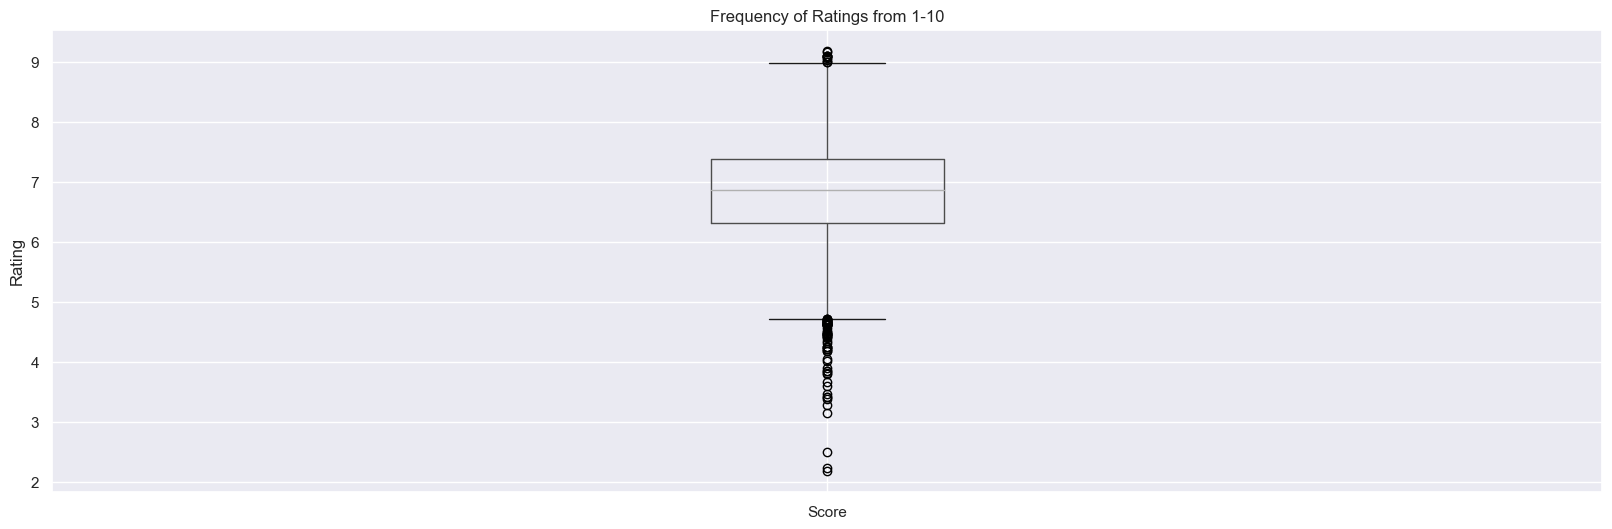

In [ ]:
df_cleaned.boxplot('Score').set(title="Frequency of Ratings from 1-10")
plt.ylabel("Rating")

This makes my findings from the above histogram a bit more obvious, the average score seems to lie closer to around 6.8. Any anime rated above 9 or below around 4.7 is enough to be considered an outlier

## Task 2: Analysis Pipeline



In [ ]:
df = pd.read_csv("../data/raw/anime.csv", usecols = ["Name", "Score", "Source", "Studios", "Ranked", "Popularity", "Completed"])
# 1. load csv

df_cleaned = df[df["Studios"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Source"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Score"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Ranked"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Popularity"] > 0]
df_cleaned = df_cleaned[df_cleaned["Completed"] > 0]
df_cleaned['Ranked'] = df_cleaned['Ranked'].astype('int64')
df_cleaned['Score'] = df_cleaned['Score'].astype('float64')
# 2. clean data

# 3 and 4: No additional processing or wrangling needed

df_cleaned


,Name,Score,Studios,Source,Ranked,Popularity,Completed
0,Cowboy Bebop,8.78,Sunrise,Original,28,39,718161
1,Cowboy Bebop: Tengoku no Tobira,8.39,Bones,Original,159,518,208333
2,Trigun,8.24,Madhouse,Manga,266,201,343492
3,Witch Hunter Robin,7.27,Sunrise,Original,2481,1467,46165
4,Bouken Ou Beet,6.98,Toei Animation,Manga,3710,4369,7314
...,...,...,...,...,...,...,...
17478,Santa Company: Manatsu no Merry Christmas,5.68,ORENDA,Original,9202,9286,985
17502,Shin Gengou Nyankogelion,6.41,PONOS Corporation,Original,6360,12289,390
17505,Heikousen,7.52,"10Gauge, Studio DURIAN",Original,1517,10869,549
17513,Yakusoku no Neverland 2nd Season: Michishirube,4.81,CloverWorks,Manga,10760,4398,8196


## Task 3: Method Chaining

In [ ]:
def load_and_process(data):

    df = (
    pd.read_csv(data, usecols = ["Name", "Score", "Source", "Studios", "Ranked", "Popularity", "Completed"])
    .pipe(lambda x: x.loc[x['Studios'] != "Unknown"]) 
    .pipe(lambda x: x.loc[x['Score'] != "Unknown"])
    .pipe(lambda x: x.loc[x['Ranked'] != "Unknown"])
    .pipe(lambda x: x.loc[x['Source'] != "Unknown"])
    )
    # load data and remove rows with unknowns

    df2 = (
    df
    .pipe(lambda x: x.loc[x['Popularity'] > 0])
    .pipe(lambda x: x.loc[x['Completed'] > 0])
    .assign(Score = df.Score.astype('float64'))
    .assign(Popularity = df.Popularity.astype('int64'))
    .assign(Ranked = df.Ranked.astype('int64'))
    )
    # remove animes that nobody has ever fully completed and convert score, ranked and popularity to numerical types

    return df2

In [ ]:
df2 = load_and_process("../data/raw/anime.csv")
# test method chain 

## Task 4: Data Analysis

<AxesSubplot: title={'center': 'Amount of Animes by Source Material'}, xlabel='Source Material', ylabel='Amount of Anime'>

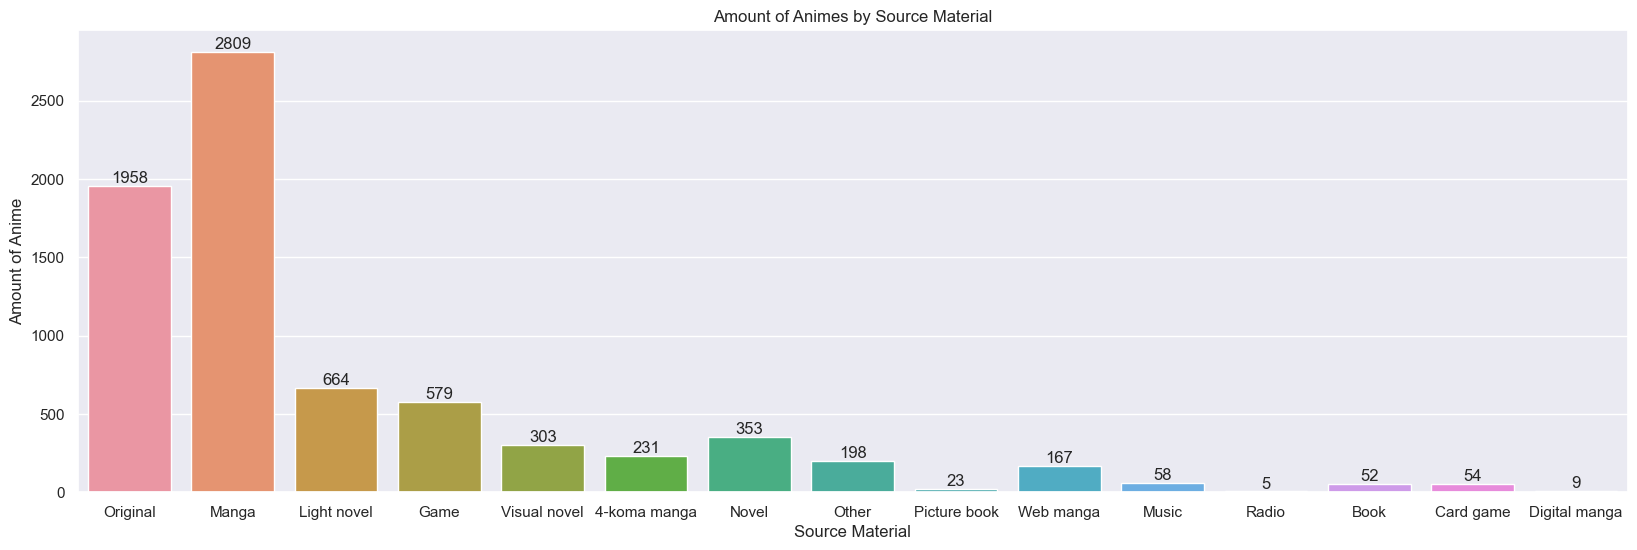

In [ ]:
df = load_and_process("../data/raw/anime.csv")

sns.set(rc = {'figure.figsize':(20,6)})
countSources = sns.countplot(x=df["Source"])
countSources.bar_label(countSources.containers[0])
plt.xlabel("Source Material")
plt.ylabel("Amount of Anime")
countSources.set(title = "Amount of Animes by Source Material")
countSources
# graph the amount of each type of source material

**Figure 1**

It seems that manga adaptations are overwhelmingly the most common, followed by anime originals and then light novels.

Text(0.5, 0, 'Source Material')

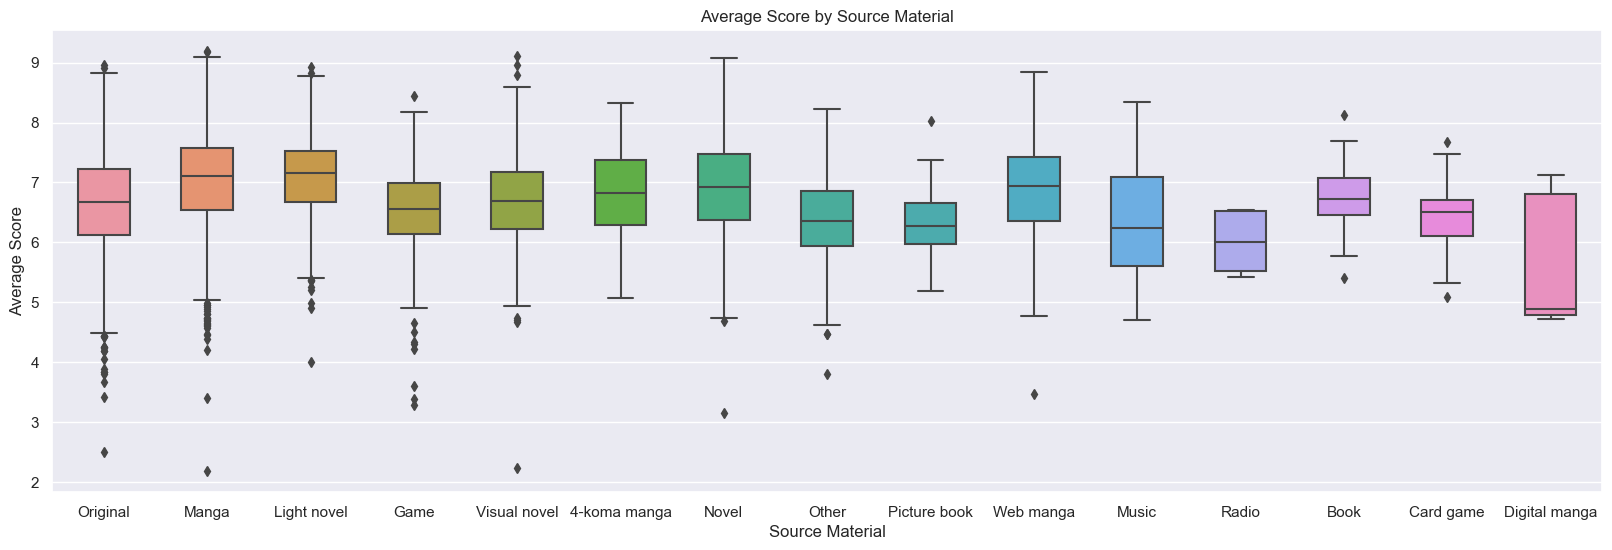

In [ ]:
sns.boxplot(data=df, x="Source", y="Score", width = 0.5).set(title="Average Score by Source Material")
plt.ylabel("Average Score")
plt.xlabel("Source Material")

**Figure 2**

Despite light novel adaptations being nowhere near as common as manga adaptations or
anime originals, they are the most well rated by a small margin on average compared to manga, and a fairly large margin compared to anime originals.

Interestingly, there are no light novels with a score above 9 but a fair number of manga with a score above 9

In [ ]:
MeanScoreBySource = df.groupby('Source')['Score'].mean()
MeanScoreBySource.sort_values(axis=0, ascending = False)

Source
Light novel      7.108735
Manga            7.048943
Novel            6.929943
Web manga        6.888144
4-koma manga     6.795022
Book             6.751923
Visual novel     6.686997
Original         6.646078
Game             6.521658
Card game        6.417963
Other            6.408939
Picture book     6.398261
Music            6.340517
Radio            6.006000
Digital manga    5.618889
Name: Score, dtype: float64

This table makes the averages much more clear, as with Figure 2, light novels on average have the highest score followed by mangas. Interestingly, anime originals only average a score of 6.65 despite how many more anime originals there are compared to light novels.

In [ ]:
above9 = df[df['Score'] > 9]
above9.sort_values('Ranked')
# print every anime with an average score above 9

,Name,Score,Studios,Source,Ranked,Popularity,Completed
3971,Fullmetal Alchemist: Brotherhood,9.19,Bones,Manga,1,3,1644938
15926,Shingeki no Kyojin: The Final Season,9.17,MAPPA,Manga,2,119,553
5683,Steins;Gate,9.11,White Fox,Visual novel,3,9,1134756
14963,Shingeki no Kyojin Season 3 Part 2,9.10,Wit Studio,Manga,4,63,906824
9913,Gintama°,9.10,Bandai Namco Pictures,Manga,5,329,167130
6474,Hunter x Hunter (2011),9.10,Madhouse,Manga,6,12,1094486
741,Ginga Eiyuu Densetsu,9.07,"Artland, Magic Bus",Novel,7,633,52583
6006,Gintama',9.08,Sunrise,Manga,7,362,190008
7261,Gintama': Enchousen,9.04,Sunrise,Manga,9,660,143353


It turns out that there's only 9 anime that have ever gotten a score above 9, with the overwhelming majority of those being manga adaptations. This probably isn't a very useful metric to track as the sample size is tiny.

Text(0.5, 0, 'Source Material')

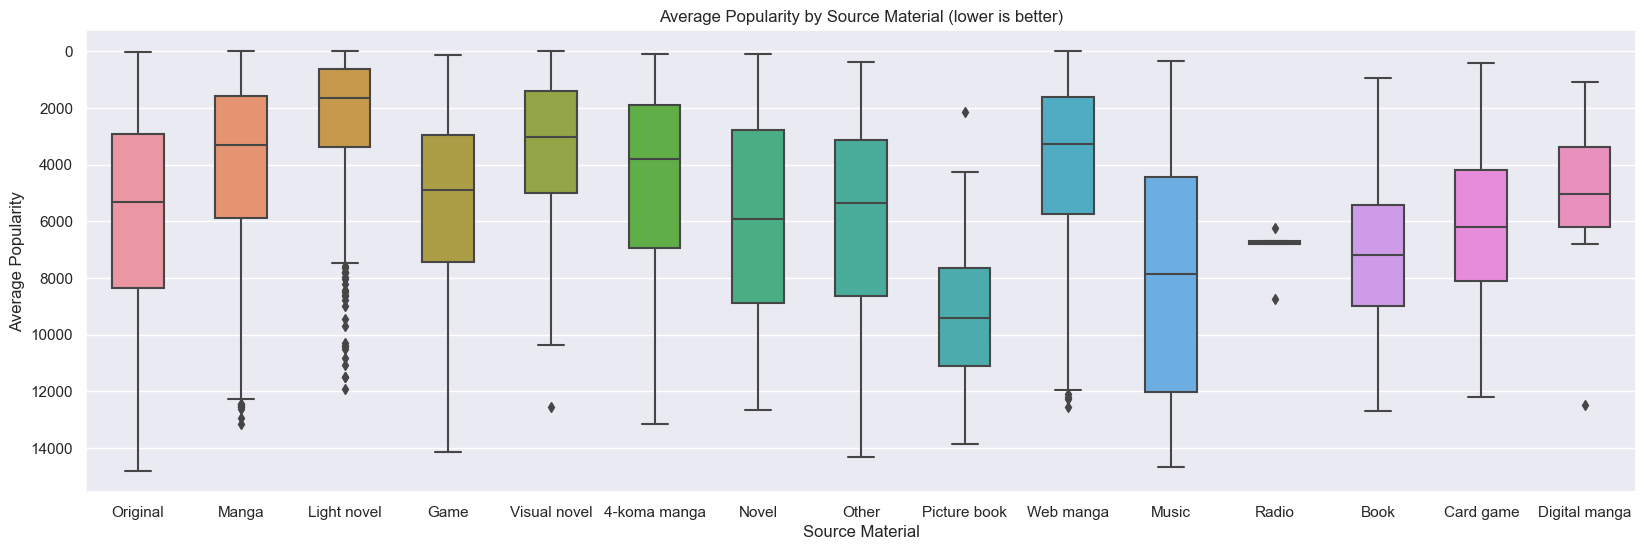

In [ ]:
popBox = sns.boxplot(data=df, x="Source", y="Popularity", width = 0.5)
popBox.set(title="Average Popularity by Source Material (lower is better)")
popBox.invert_yaxis()
plt.ylabel("Average Popularity")
plt.xlabel("Source Material")
# flip the y axis, as the Popularity column is a ranking (eg most popular anime ever has a Popularity of 1)

**Figure 3**

Despite how few light novel adaptations there are compared to manga adaptations and anime originals, light novel adaptations are the most popular on average by a very significant margin

In [ ]:
MeanPopBySource = df.groupby('Source')['Popularity'].mean()
MeanPopBySource.sort_values(axis=0)

Source
Light novel      2312.661145
Visual novel     3481.221122
Web manga        4049.982036
Manga            4076.602350
4-koma manga     4517.242424
Digital manga    5138.444444
Game             5349.958549
Original         5712.845761
Other            5893.444444
Novel            5915.535411
Card game        6070.000000
Radio            7053.000000
Book             7199.115385
Music            8000.396552
Picture book     8920.739130
Name: Popularity, dtype: float64

Another table to more clearly show the average popularity of each source material type.
Light novels are overwhelmingly the most popular on average, followed by visual novels and various forms of manga.
Web manga adaptations seem to be the most popular on average by a small amount, with digital manga being the least popular.

In [ ]:
df.sort_values('Popularity').drop_duplicates(['Source'])

,Name,Score,Studios,Source,Ranked,Popularity,Completed
1393,Death Note,8.63,Madhouse,Manga,60,1,2146116
6614,Sword Art Online,7.25,A-1 Pictures,Light novel,2584,4,1907261
10451,One Punch Man,8.57,Madhouse,Web manga,81,5,1841220
5683,Steins;Gate,9.11,White Fox,Visual novel,3,9,1134756
11308,Kimi no Na wa.,8.96,CoMix Wave Films,Original,16,11,1462143
6710,Hyouka,8.14,Kyoto Animation,Novel,374,81,513461
4273,K-On!,7.84,Kyoto Animation,4-koma manga,758,108,519279
7475,Danganronpa: Kibou no Gakuen to Zetsubou no Ko...,7.29,Lerche,Game,2387,137,515794
8496,Mekakucity Actors,7.08,Shaft,Music,3295,354,219659
7211,Love Live! School Idol Project,7.44,Sunrise,Other,1771,379,228525


Just to satisfy my curiosity, above is the most popular anime of each different type of source material

In [ ]:
df.sort_values('Score', ascending = False).drop_duplicates(['Source'])

,Name,Score,Studios,Source,Ranked,Popularity,Completed
3971,Fullmetal Alchemist: Brotherhood,9.19,Bones,Manga,1,3,1644938
5683,Steins;Gate,9.11,White Fox,Visual novel,3,9,1134756
741,Ginga Eiyuu Densetsu,9.07,"Artland, Magic Bus",Novel,7,633,52583
11308,Kimi no Na wa.,8.96,CoMix Wave Films,Original,16,11,1462143
12933,Owarimonogatari 2nd Season,8.93,Shaft,Light novel,17,521,159101
14306,Mob Psycho 100 II,8.84,Bones,Web manga,22,101,623709
17199,Gotcha!,8.44,Bones,Game,131,4280,12572
12320,Shelter,8.34,A-1 Pictures,Music,195,539,234951
5846,K-On! Movie,8.33,Kyoto Animation,4-koma manga,202,607,183015
7492,Kaguya-hime no Monogatari,8.23,Studio Ghibli,Other,280,1017,94381


And above is the most well rated anime of each type of source material

**Correlation between anime source material and rating**

As seen in figure 2, there is a clear correlation between an anime's source material and it's average rating. Light novel adaptions seem to by the most well received by a small margin, followed by manga adaptations and full length novel adaptations. Interesting to note is that despite how many anime originals there are (*1958* compared to *664* light novel adaptations), they are on average far worse received in comparison with an average rating of only *6.65* compared to *7.11* for light novel adaptations.

**Correlation between anime source material and popularity**

As seen in figure 3, there is also a clear correlation between an anime's source material and how popular it is. On average, light novel adaptions are vastly more popular than any other source material, followed by visual novel adaptations and adaptations of various forms of manga.

In [ ]:
df2.to_csv("../data/processed/processed2.csv")